# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

---
**Important note:**  
This notebook was automatically generated with AI assistance and has not been manually verified. Use caution when interpreting outputs or results, and review the code carefully before relying on it for major analyses.

---

## Overview

This notebook introduces and demonstrates data exploration for [Dandiset 000617, version 0.250312.0130](https://dandiarchive.org/dandiset/000617/0.250312.0130):

**Title:** Allen Institute Openscope - Sequence Learning Project  
**Keywords:** L2/3, L4, two-photon calcium imaging, prediction, pyramidal neurons, somata, neocortex, predictive coding, sequence learning, movies  
**Contributors:** National Institutes of Health (NIH), Allen Institute, Michael Berry, Jérôme Lecoq, Avalon Amaya, and many others  
**Description:**  
Adaptive and coordinated behavior requires that an animal be able to make predictions about the future. In this sequence learning experiment, head-fixed mice viewed sequences and random orders of natural movie clips, while two-photon calcium imaging recorded neural activity from visual cortex. The experiment included both pre- and post-training phases.  

For full metadata and experimental context, see the Dandiset page:  
https://dandiarchive.org/dandiset/000617/0.250312.0130

## What this notebook covers
- Lists packages required to run all cells (assumes they are already installed)
- Shows how to connect to the archive using DANDI API
- Lists some available NWB files
- Loads one NWB file and summarizes key contents (structure, ROI table, traces, dF/F, stimuli, running wheel, etc.)
- Links to interactive exploration on Neurosift
- Loads and visualizes fluorescence/dF/F traces, stimulus frames, and ROI masks
- Demonstrates working with interval and ROI tables
- Provides visual inspection and summaries, with comments to guide further work
- Outlines future directions for more advanced analysis

**Do not interpret results in this notebook as definitive science. The notebook's aim is to guide you through data access and exploration.**

---

## Packages required
- dandi
- pynwb
- remfile
- h5py
- pandas
- numpy
- matplotlib
- seaborn

## Connect to the DANDI archive and list assets

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and get metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url'] if 'url' in metadata else 'https://dandiarchive.org/dandiset/000617/0.250312.0130'}")

assets = dandiset.get_assets()
print("\nFirst 5 assets in the Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets in the Dandiset:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


## Selected NWB file for exploration

In this notebook, we focus on one ophys NWB file:

**File path:**  
`sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`

**DANDI asset download URL:**  
`https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/`

[View this file interactively on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=0.250312.0130)

**We will demonstrate how to load and explore this NWB file using PyNWB and friends.**

## Load the NWB file

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("NWB identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("File created on:", nwb.file_create_date)
print("Subject ID:", nwb.subject.subject_id)
print("Subject sex:", nwb.subject.sex)
print("Subject species:", nwb.subject.species)
print("Institution:", nwb.institution)
print("Keywords:", list(nwb.keywords))

Session description: Ophys Session
NWB identifier: 1280384858
Session start time: 2023-06-30 16:04:51.055000+00:00
File created on: [datetime.datetime(2025, 2, 18, 10, 31, 0, 305861, tzinfo=tzutc())]
Subject ID: 677038
Subject sex: F
Subject species: Mus musculus
Institution: Allen Institute for Brain Science
Keywords: ['2-photon', 'calcium imaging', 'visual cortex', 'behavior', 'task']


## Summary of major NWB file components

The file contains the following key elements:

**Acquisition:**  
- `v_in` (TimeSeries): Theoretical maximum voltage from running wheel encoder  
- `v_sig` (TimeSeries): Voltage signal from running wheel encoder

**stimulus_template:**  
- `gray`, `movie_clip_A`, `movie_clip_B`, `movie_clip_C` (ImageSeries): Movie and gray screen stimuli. Each is a stack with shape (1280, 720, 120).

**processing/ophys:**  
- Fluorescence and dF/F traces, event detection, segmentation ROI table, image masks, and more

**processing/running:**  
- Running wheel speed/time data

**intervals:**  
- `gray_presentations`, `movie_clip_A_presentations`, `movie_clip_B_presentations`, `movie_clip_C_presentations`: TimeIntervals tables with detailed stimulus timing and metadata.

---

Below is a summary tree (showing module/field hierarchy for major types; not fully exhaustive):

```
NWBFile
├─ acquisition
│   ├─ v_in (TimeSeries)
│   └─ v_sig (TimeSeries)
├─ stimulus_template
│   ├─ gray (ImageSeries)
│   ├─ movie_clip_A (ImageSeries)
│   ├─ movie_clip_B (ImageSeries)
│   └─ movie_clip_C (ImageSeries)
├─ processing
│   ├─ ophys
│   │   ├─ corrected_fluorescence (Fluorescence)
│   │   ├─ dff (DfOverF)
│   │   ├─ event_detection (OphysEventDetection)
│   │   ├─ image_segmentation (ImageSegmentation)
│   │   ├─ images (Images)
│   │   ├─ neuropil_trace (Fluorescence)
│   │   ├─ ophys_motion_correction_x (TimeSeries)
│   │   └─ ophys_motion_correction_y (TimeSeries)
│   ├─ running
│   │   ├─ dx (TimeSeries)
│   │   ├─ speed (TimeSeries)
│   │   └─ speed_unfiltered (TimeSeries)
│   ├─ stimulus (ProcessingModule)
│   │   └─ timestamps (TimeSeries)
│   └─ stimulus_ophys (ProcessingModule)
│       └─ timestamps (TimeSeries)
├─ intervals
│   ├─ gray_presentations (TimeIntervals)
│   ├─ movie_clip_A_presentations (TimeIntervals)
│   ├─ movie_clip_B_presentations (TimeIntervals)
│   └─ movie_clip_C_presentations (TimeIntervals)
├─ subject (Subject information)
├─ imaging_planes
└─ devices
```

We will now demonstrate loading and exploring selected components below.

## Examine the ROI table ("PlaneSegmentation") and segmentation masks

In [3]:
import pandas as pd

# Get the segmentation plane: PlaneSegmentation table holding ROIs
roi_table = (
    nwb.processing['ophys']
    .data_interfaces['image_segmentation']
    .plane_segmentations['cell_specimen_table']
)

# Convert the table to a pandas DataFrame (safe to peek at .head())
roi_df = roi_table.to_dataframe()
print("ROI DataFrame shape:", roi_df.shape)
roi_df.head()

ROI DataFrame shape: (121, 12)


,cell_specimen_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,image_mask
id,,,,,,,,,,,,
1285902696,-1,22,1,4.0,18.0,5.0,23.0,True,23,47,47,"[[False, False, False, False, False, False, Fa..."
1285902717,-1,18,1,4.0,18.0,5.0,23.0,True,18,282,32,"[[False, False, False, False, False, False, Fa..."
1285902742,-1,19,1,4.0,18.0,5.0,23.0,True,21,420,35,"[[False, False, False, False, False, False, Fa..."
1285902805,-1,22,0,4.0,18.0,5.0,23.0,True,23,348,196,"[[False, False, False, False, False, False, Fa..."
1285902819,-1,20,0,4.0,18.0,5.0,23.0,True,19,447,197,"[[False, False, False, False, False, False, Fa..."


The ROI table contains all segmented cells, with columns such as cell_specimen_id, x/y positions, widths, heights, and valid_roi flags.

We'll plot the spatial locations of all segmented ROIs over the (512 x 512) imaging field.

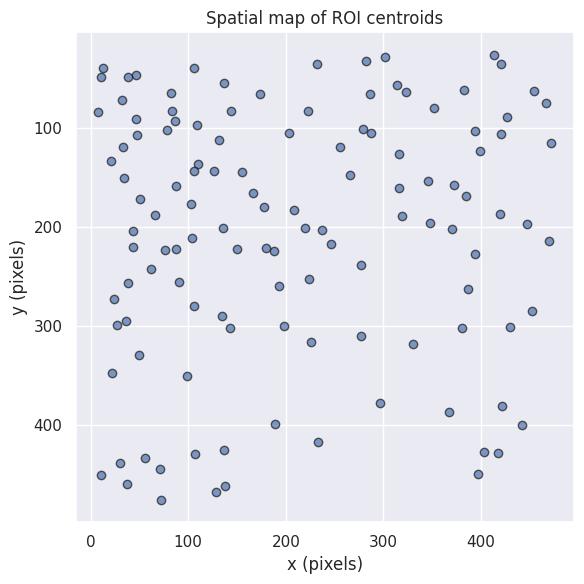

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(6, 6))
plt.scatter(roi_df['x'], roi_df['y'], marker='o', alpha=0.7, edgecolor='k')
plt.title('Spatial map of ROI centroids')
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Visualize mean mask of all ROIs (cell segmentation masks)
All image masks have values in [0, 1] and are stacked in roi_table.image_mask.
We will plot a heatmap corresponding to the superposition (max projection) of all ROI masks.

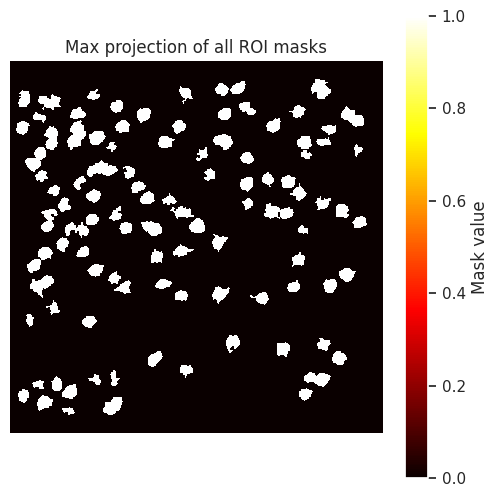

In [5]:
import numpy as np

# Each entry is a 512 x 512 array, stack them and do np.max
all_masks = np.stack(roi_table.image_mask[:])
mask_max = np.max(all_masks, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(mask_max, cmap='hot', interpolation='nearest')
plt.title('Max projection of all ROI masks')
plt.colorbar(label='Mask value')
plt.axis('off')
plt.show()

## Inspect dF/F traces for selected ROIs

dF/F traces shape (time x cells): (40019, 121)
ROI IDs (first 5): [-1 -1 -1 -1 -1]
First timestamp: 22.35562 Last: 4226.80358


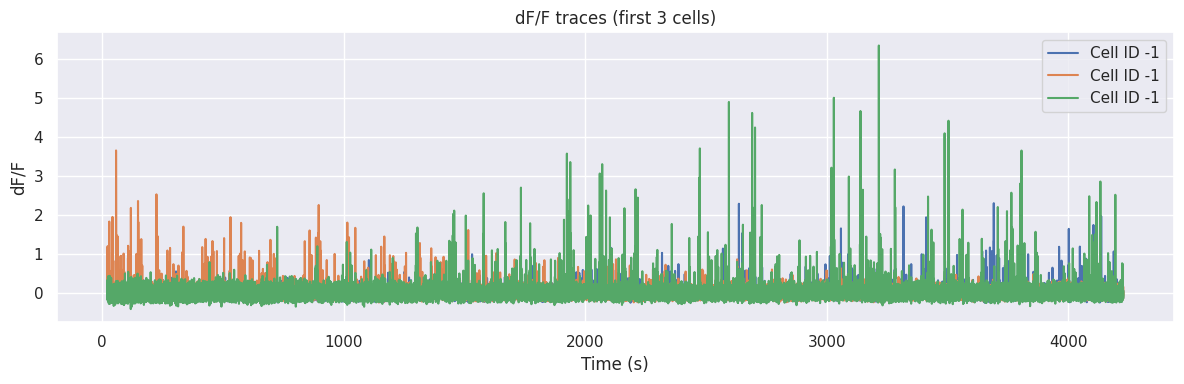

In [6]:
# dF/F traces are (frames, cells): shape (40019, 121)
dff_traces = (
    nwb.processing['ophys']
    .data_interfaces['dff']
    .roi_response_series['traces']
)

roi_ids = dff_traces.rois.table.cell_specimen_id[:]
timestamps = dff_traces.timestamps[:]
data = dff_traces.data[:, :] # Load all; if slow, restrict below

print("dF/F traces shape (time x cells):", data.shape)
print("ROI IDs (first 5):", roi_ids[:5])
print("First timestamp:", timestamps[0], "Last:", timestamps[-1])

# Limit to first 3 cells for plotting for speed
n_show_cells = 3
plt.figure(figsize=(12, 4))
for i in range(n_show_cells):
    plt.plot(timestamps, data[:, i], label=f'Cell ID {roi_ids[i]}')
plt.xlabel('Time (s)')
plt.ylabel('dF/F')
plt.title('dF/F traces (first 3 cells)')
plt.legend()
plt.tight_layout()
plt.show()

## Example: Explore stimulus intervals (movie_clip_A presentations)

NWB files provide detailed tables indicating when each movie was presented.
Let's load a sample of the `movie_clip_A_presentations` intervals.

In [7]:
movie_clip_A_intervals = nwb.intervals['movie_clip_A_presentations']
movie_A_df = movie_clip_A_intervals.to_dataframe()
print("Shape:", movie_A_df.shape)
movie_A_df.head(10)

Shape: (63000, 14)


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,22.908110,22.924791,movie_clip_A,0.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,22.924791,22.941472,movie_clip_A,0.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,22.941472,22.958153,movie_clip_A,0.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(5, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,22.958153,22.974834,movie_clip_A,0.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(6, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,22.974834,22.991515,movie_clip_A,0.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(7, 1, timestamps pynwb.base.TimeSeries at 0x..."
5,22.991515,23.008196,movie_clip_A,0.0,5.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(8, 1, timestamps pynwb.base.TimeSeries at 0x..."
6,23.008196,23.024877,movie_clip_A,0.0,6.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(9, 1, timestamps pynwb.base.TimeSeries at 0x..."
7,23.024877,23.041558,movie_clip_A,0.0,7.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(10, 1, timestamps pynwb.base.TimeSeries at 0..."
8,23.041558,23.058239,movie_clip_A,0.0,8.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(11, 1, timestamps pynwb.base.TimeSeries at 0..."


## Example: Inspect movie stimuli frames (stimulus_template)

`movie_clip_A`, `movie_clip_B`, and `movie_clip_C` are each (1280, 720, 120) uint8 image stacks.
We'll plot the first frame of movie_clip_A.  
This can take a moment if the remote stream is slow.

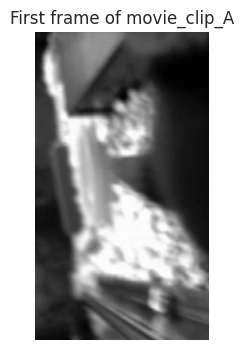

In [8]:
frames_A = nwb.stimulus_template['movie_clip_A'].data
frame0 = frames_A[:, :, 0]

plt.figure(figsize=(6, 4))
plt.imshow(frame0, cmap='gray')
plt.title('First frame of movie_clip_A')
plt.axis('off')
plt.show()

## Running wheel data: plot velocity
The running wheel signal is in `processing/running/speed` (shape: 252000, ).

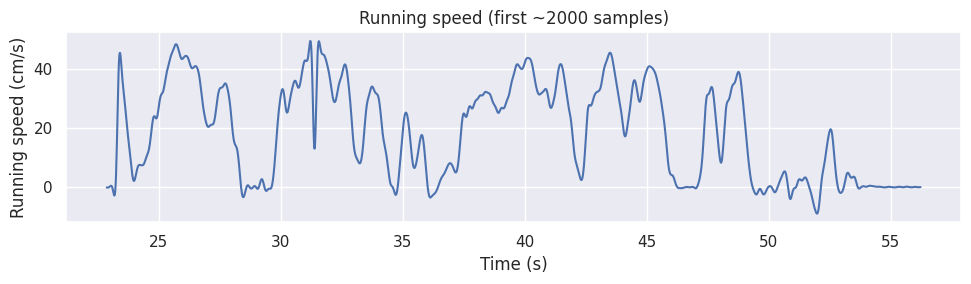

In [9]:
speed_ts = (
    nwb.processing['running']
    .data_interfaces['speed']
)
sp_times = speed_ts.timestamps[:]
sp_data = speed_ts.data[:]

plt.figure(figsize=(10, 3))
plt.plot(sp_times[:2000], sp_data[:2000])
plt.xlabel('Time (s)')
plt.ylabel('Running speed (cm/s)')
plt.title('Running speed (first ~2000 samples)')
plt.tight_layout()
plt.show()

## Summary and future directions

- This Dandiset contains rich two-photon imaging and behavioral data, annotated with detailed stimulus and cell segmentation tables.
- We've shown how to load metadata, ROI segmentations, dF/F traces, running behavior, and movie stimuli using PyNWB and friends.
- You can explore additional NWB files similarly—see the asset list at the start.
- Future analysis directions:
    - Relate dF/F signals to stimulus presentation intervals
    - Classify or cluster cells by response profile or ROIs
    - Analyze running-dependent modulation of fluorescence
    - Explore other stimulus types and intervals (B, C, gray)
    - Use `to_dataframe()` for full cell and interval tables, and link to the mouse/specimen metadata

---

For interactive visualization, consider using Neurosift:  
[Neurosift: View this NWB file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=0.250312.0130)

---

**Notebook generated using AI assistance; please verify all code and results.**